In [1]:
# First, let's read the CSV file to understand its contents and structure
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file
file_path = 'leader_board.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()


,Model,t850,t2m(6h/day1/day3/day5),10v,10u,z500
0,AFNO,0.957/1.523/2.485/3.417,0.997/1.492/2.254/2.903,1.371/2.058/3.27/4.181,1.324/2.019/3.192/4.049,69.837/201.64/578.62/920.691
1,AFNO+uncertain,0.905/1.33/2.216/3.269,1.003/1.474/2.27/3.063,1.031/1.46/2.677/3.925,1.018/1.442/2.579/3.704,74.685/162.96/464.098/805.963
2,VIT,0.801/1.125/1.802/2.696,0.85/1.189/1.715/2.294,0.931/1.374/2.517/3.724,0.907/1.342/2.477/3.618,66.147/133.918/354.58/646.748
3,VIT+uncertain,0.753/1.087/1.746/2.572,0.735/1.08/1.614/2.179,0.979/1.373/2.364/3.454,0.945/1.335/2.332/3.364,56.332/116.768/322.849/589.453
4,Swin,0.76/1.104/1.753/2.557,0.803/1.138/1.654/2.19,0.995/1.432/2.469/3.522,0.951/1.385/2.414/3.409,54.005/116.388/320.618/583.626


In [2]:
def split_values(column):
    return column.str.split('/', expand=True).astype(float)

t850_values = split_values(data['t850'])
t2m_values = split_values(data['t2m(6h/day1/day3/day5)'])
v10_values = split_values(data['10v'])
u10_values = split_values(data['10u'])
z500_values = split_values(data['z500'])
models = data['Model']

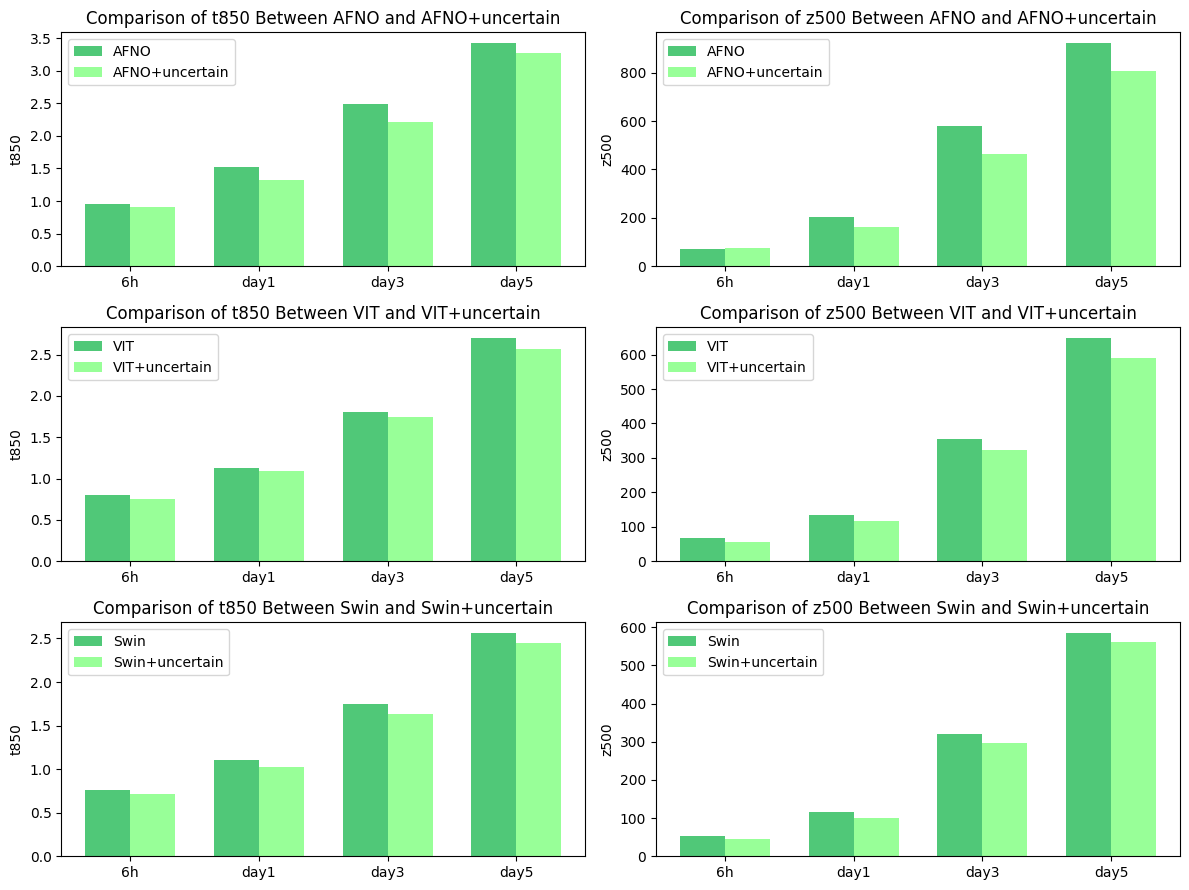

In [13]:
from turtle import color
import numpy as np
# Modifying the function to put the comparison of models into the same figure for each variable
def plot_combined_bar_comparison(t850_values, z500_values, models, pairs_to_compare=[(0,1), (2,3), (4,5)]):
    # Number of pairs to compare
    num_pairs = len(pairs_to_compare)

    # Creating a figure with subplots
    fig, axs = plt.subplots(num_pairs, 2, figsize=(12, 3 * num_pairs))

    # Plotting for each pair
    for i, (a, b) in enumerate(pairs_to_compare):
        # Data for t850
        model1_data_t850 = t850_values.iloc[a]
        model2_data_t850 = t850_values.iloc[b]
        ind = np.arange(len(model1_data_t850))  # X locations for the groups
        width = 0.35  # width of the bars
        color1 = '#50C878'  # Choose the color you like
        color2 = '#98FF98'   # Choose a different color
        # t850 bars
        axs[i, 0].bar(ind - width/2, model1_data_t850, width, label=models[a],color=color1)
        axs[i, 0].bar(ind + width/2, model2_data_t850, width, label=models[b],color=color2)

        # Formatting t850 subplot
        axs[i, 0].set_title(f'Comparison of t850 Between {models[a]} and {models[b]}')
        axs[i, 0].set_xticks(ind)
        axs[i, 0].set_xticklabels(['6h', 'day1', 'day3', 'day5'])
        axs[i, 0].set_ylabel('t850')
        axs[i, 0].legend()

        # Data for z500
        model1_data_z500 = z500_values.iloc[a]
        model2_data_z500 = z500_values.iloc[b]

        # z500 bars
        axs[i, 1].bar(ind - width/2, model1_data_z500, width, label=models[a],color=color1)
        axs[i, 1].bar(ind + width/2, model2_data_z500, width, label=models[b],color=color2)

        # Formatting z500 subplot
        axs[i, 1].set_title(f'Comparison of z500 Between {models[a]} and {models[b]}')
        axs[i, 1].set_xticks(ind)
        axs[i, 1].set_xticklabels(['6h', 'day1', 'day3', 'day5'])
        axs[i, 1].set_ylabel('z500')
        axs[i, 1].legend()

    plt.tight_layout()
    plt.show()




# Visualizing "t850" and "z500" for the first 3 pairs of models in bar chart format
plot_combined_bar_comparison(t850_values, z500_values, models)